<a href="https://colab.research.google.com/github/IrinaBoyarchukova/A_B_test/blob/main/Sem__6_%D0%A0%D0%B0%D1%81%D1%87%D1%91%D1%82_%D0%B4%D0%BB%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%90_B_%D1%82%D0%B5%D1%81%D1%82%D0%B0_%2B_%D0%BF%D1%80%D0%BE%D0%B4%D0%B2%D0%B8%D0%BD%D1%83%D1%82%D1%8B%D0%B5_%D1%82%D0%BE%D0%BF%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin
import numpy as np



In [2]:
def calc_proportion_es(prob1: float, prob2: float):
    
    return abs(proportion_effectsize(prob1, prob2))

def calc_proportion_es_alt(conv1: float, conv2:float, prob1:float, prob2: float):
    
    return 2  * asin(np.sqrt(conv1/nobs1)) - 2 * asin(np.sqrt(conv2/nobs2))

def calc_continuous_es(mean_control: Union[float, int],
                       std_control: Union[float, int],
                       mean_test: Union[float, int],
                       std_test: Union[float, int]):
    
    return abs(effectsize_smd(mean_control,
                              std_control,
                              1e4,
                              mean_test,
                              std_test,
                              1e4)[0])

def calc_continuous_es_alt(mean_control: Union[float, int],
                           std_control: Union[float, int],
                           mean_test: Union[float, int],
                           std_test: Union[float, int]):
    
    effect_size = (mean_test - mean_control) / ((std_control**2 + std_test**2) / 2) ** 0.5
    return effect_size
    
def calc_sample_size_continuous(effect_size: float,
                     alpha: float = .05,
                     beta: float = .2,
                     ratio: Union[float, int] = 1):
    
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

def calc_sample_size_proportion(effect_size: float,
                     alpha: float = .05,
                     beta: float = .2,
                     ratio: Union[float, int] = 1):
    
    n = zt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

Задача 1 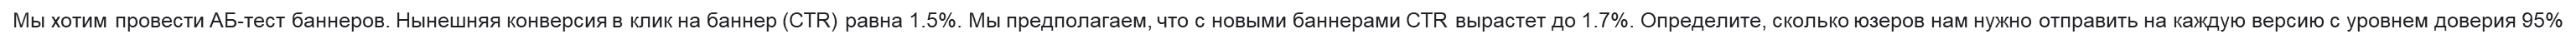

In [3]:
conv1, conv2 = 0.015, 0.017

es_prop = calc_proportion_es(conv1, conv2)
#es_prop_alt = calc_proportion_es(conv1, conv2)
es_prop

0.015947131645016377

In [4]:
calc_sample_size_proportion(es_prop)

123452

Задача 2 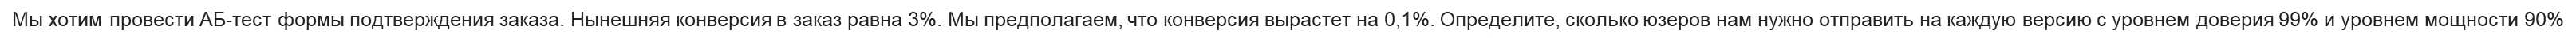

In [5]:
conv1, conv2 = 0.03, 0.031

es_prop = calc_proportion_es(conv1, conv2)
#es_prop_alt = calc_proportion_es(conv1, conv2)
es_prop

0.005815545699511593

In [7]:
calc_sample_size_proportion(es_prop, alpha=.01, beta=.1)

1759803

In [18]:
n_conv1, n_conv2 = 164, 228
nobs1, nobs2 = 15500, 15500

conv1, conv2 = n_conv1/nobs1, n_conv2/nobs2
calc_proportion_es(conv1, conv2), calc_proportion_es_alt(n_conv1, n_conv2, nobs1, nobs2)

(0.03707652191393576, -0.03707652191393576)

Задача 3 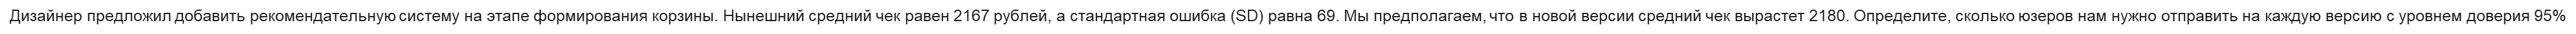

In [12]:
mu_control, mu_test = 2167, 2180
std_control, std_test = 69, 69 * 1.15

es_cont = calc_continuous_es(mu_control, std_control, mu_test, std_test)
es_cont_alt = calc_continuous_es_alt(mu_control, std_control, mu_test, std_test)
es_cont, es_cont_alt

(0.17482965875688977, 0.17483621585265752)

In [10]:
calc_sample_size_continuous(es_cont), calc_sample_size_continuous(es_cont_alt)

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


(1029, 1029)

In [15]:
calc_sample_size_continuous(es_cont, alpha=.01, beta=.1), calc_sample_size_continuous(es_cont_alt)

(1950, 1029)

Задача 5 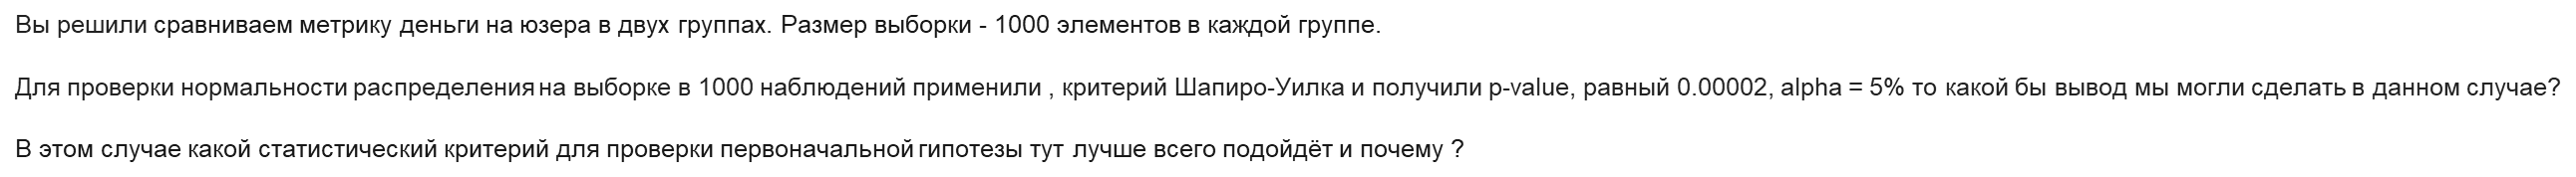

Задача 6 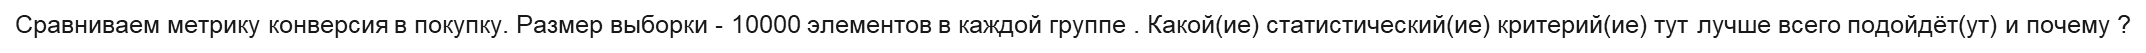